<a href="https://colab.research.google.com/github/Fantcoder/Codesoft/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8798 - loss: 0.4117 - val_accuracy: 0.9742 - val_loss: 0.0849
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9828 - loss: 0.0576 - val_accuracy: 0.9864 - val_loss: 0.0472
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9880 - val_loss: 0.0426
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9874 - val_loss: 0.0410
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9900 - val_loss: 0.0344
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9948 - loss: 0.0140 - val_accuracy: 0.9898 - val_loss: 0.0394
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9967 - loss: 0.0113 - val_accuracy: 0.9892 - val_loss: 0.0431
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9970 - loss: 0.0098 - 

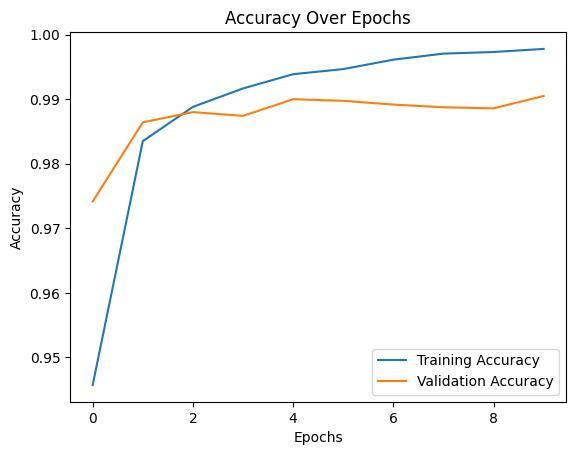

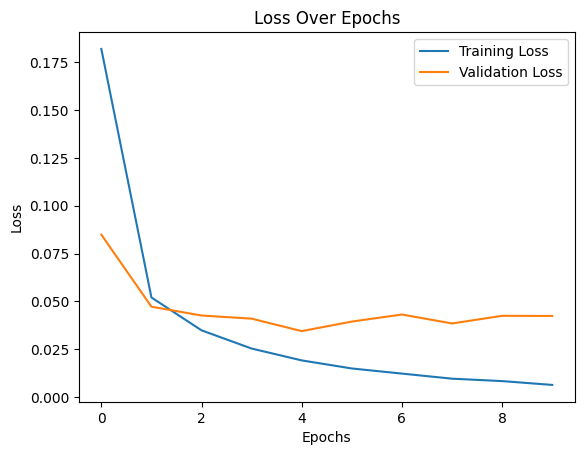

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


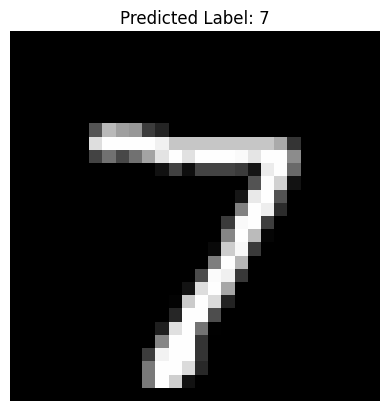

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to add channel dimension (28x28x1 for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define the CNN Model Architecture
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),  # Pooling Layer 1

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # Pooling Layer 2

    Flatten(),  # Flatten layer
    Dense(128, activation='relu'),  # Fully Connected Layer
    Dense(10, activation='softmax')  # Output Layer for 10 classes
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Step 6: Visualize Training Performance
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Step 7: Test Predictions
# Predict classes for test images
predictions = model.predict(x_test)

# Display a test image and its predicted class
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.axis('off')
plt.show()
